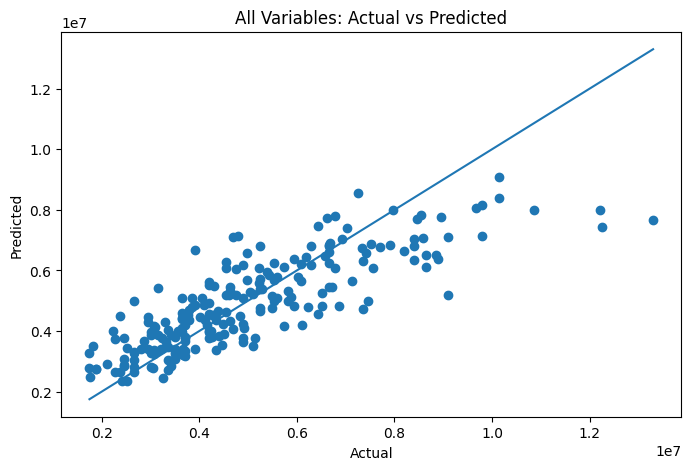


Top 2 varibales based upon correlation:
area         0.535997
bathrooms    0.517545
dtype: float64


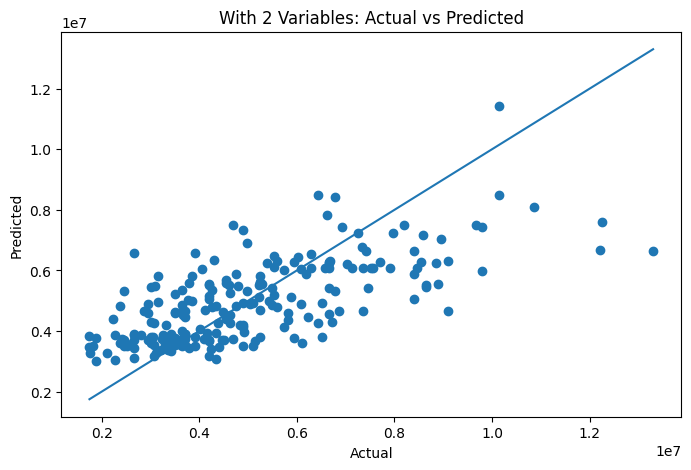

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from getpass import getuser

# user = getuser()
# csv_location = f'/home/{user}/dan/private/exrc_05/data/{user}_houses.csv'
csv_location = "ah4323_houses.csv"
# csv_location =  "FILE_NAME" ### GIVE FILE_NAME TO RUN THE CODE LOCALLY

# Load input CSV data which contains some fake data on sold houses into pandas.DataFrame
df = pd.read_csv(csv_location)

# # Get basic information about data
# print(df.info()) # prints concise summary about DataFrame's structure
# print(df.head()) # prints first five rows - default


# Get columns which contains only yes or no
yes_no_cols = [
    col
    for col in df.columns
    if df[col].astype(str).str.lower().isin(["yes", "no"]).all()
]

# print(yes_no_cols) # prints columns which contains only ´yes´ or ´no´ values

# Convert yes/no to 1/0
df[yes_no_cols] = df[yes_no_cols].apply(
    lambda col: col.astype(str).str.lower().map({"yes": 1, "no": 0}
    )                            )

# # Print sample data and dataframe information post coversion
# df.info()
# print(df.head())

# Add a dummy 1/0 variable to each of the ´furnishingstatus´ column value
df = pd.get_dummies(df, columns=["furnishingstatus"], drop_first=False, dtype=int)

# # Print sample data and dataframe information post one hot encoding ie creating dummy variable
# print(df.info())
# print(df.head())


##### Part 1: Linear regression where all the variables / features used  #####

# Split the data to 60% train, 40% test
X = df.drop(columns=["price"]) # Extract Features
y = df["price"] # Extract Response / Target

# print(X.dtypes) # to confirm all the features are of numeric data types

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.6, random_state=42 # random_state=42 is chose to ensure same rows go to train and test every time
)

# fit a linear model to the train data with all the Features using training data
linreg_all = LinearRegression()
linreg_all.fit(X_train, y_train)

# Predicting with test data
y_pred_all = linreg_all.predict(X_test)

# Plotting Actual Vs Predicted where all Variables/Features used
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_all)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("All Variables: Actual vs Predicted")
plt.show()



##### Part 2: Linear regression where Only TWO variables / features used #####

# Compute correlations for all the features against response / target
correlations = X.corrwith(y)

# Find two variables / features based upon highest correlation value
top_two = correlations.abs().sort_values(ascending=False).head(2)
print("\nTop 2 varibales based upon correlation:")
print(top_two) 


X2 = df[top_two.index] # Exract Top 2 Variables / Features
y2 = df["price"] # Extract Response / Target

# Split the data to 60% train, 40% test
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, train_size=0.6, random_state=42 # random_state=42 is chose to ensure same rows go to train and test every time
)

# fit a linear model to the train data with Only top 2 Variables of training data
linreg_2 = LinearRegression()
linreg_2.fit(X2_train, y2_train)

# Predicting with test data
y2_pred = linreg_2.predict(X2_test)

# Plotting Actual Vs Predicted where Only top 2 Variables/Features used
plt.figure(figsize=(8,5))
plt.scatter(y2_test, y2_pred)
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("With 2 Variables: Actual vs Predicted")
plt.show()
